In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc 
import pandas as pd
import seaborn as sns
from scipy import signal


from scipy.integrate import quad
from scipy.interpolate import interp1d
from astropy.cosmology import WMAP9 as cosmo

import CII_foregrounds
%load_ext autoreload
%autoreload 2

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24


########## PLOTTING FORMATTING #############
# plt.title("Cuve Optimization",fontsize = 42, y = 1.01) #takes in a z, spit
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)
# plt.legend(prop={'size': 20})

In [2]:
res = (sc.c/(238*(10**9)))/6 #diffaction limited angular resolution in radians 
print(res)

0.00020993869607843137


In [3]:
Tsys = 9.4*(10**4) #jy/sr root(s)
v_0 = 238 #ghz
int_time = 1 #s 

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


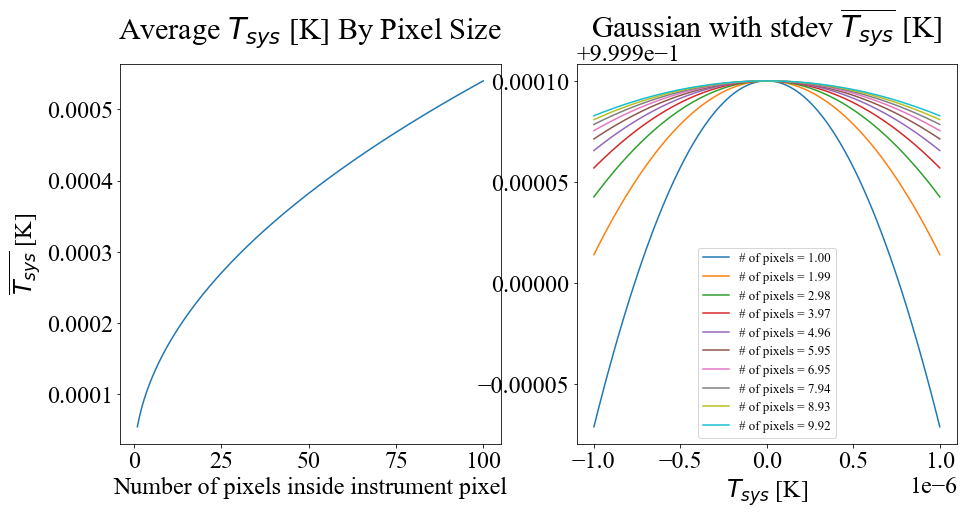

In [9]:
omega_pix = np.linspace(0.09, 3,100)

num_pix = np.linspace(1,100,1000)

T = (Tsys*(10**(-26)))*np.sqrt(num_pix) # this is still in Jy/sr * root(s)

T_sys  = (T * (sc.c**2))/(2*(v_0*(10**(9)))**2 * sc.k) # K root(s)

T_rms = T_sys/np.sqrt(int_time) # take this and need to scale it by the pixel size by reverse averaging, 

#noise = np.random.noraml(0,T_rms, (npix_y,npix_x))

# from mpl_toolkits.axes_grid1 import make_axes_locatable

x = np.linspace(-0.000001,0.000001,100)



fig, ax = plt.subplots(1,2, figsize = (15,7))
img1 = ax[0].plot(num_pix, T_rms)
ax[0].set_xlabel("Number of pixels inside instrument pixel",fontsize = 24)
ax[0].set_ylabel("$\overline{T_{sys}}$ [K]", fontsize = 24)
ax[0].set_title('Average $T_{sys}$ [K] By number of pixels', fontsize = 30, y = 1.05)

for i in range(len(omega_pix)):
    if i% 10 != 0:
        pass
    else:
        img2 = ax[1].plot(x,gaussian(x,0,T_rms[i])/max(gaussian(x,0,T_rms[i])), label = '# of pixels = %.2f' %num_pix[i])
        ax[1].legend(fontsize = 13)
        ax[1].set_xlabel('$T_{sys}$ [K]', fontsize = 24)
        ax[1].set_title('Gaussian with stdev $\overline{T_{sys}}$ [K]',fontsize = 30, y = 1.05)


In [12]:
np.logspace(-3,100,100)

array([1.00000000e-003, 1.09749877e-002, 1.20450354e-001, 1.32194115e+000,
       1.45082878e+001, 1.59228279e+002, 1.74752840e+003, 1.91791026e+004,
       2.10490414e+005, 2.31012970e+006, 2.53536449e+007, 2.78255940e+008,
       3.05385551e+009, 3.35160265e+010, 3.67837977e+011, 4.03701726e+012,
       4.43062146e+013, 4.86260158e+014, 5.33669923e+015, 5.85702082e+016,
       6.42807312e+017, 7.05480231e+018, 7.74263683e+019, 8.49753436e+020,
       9.32603347e+021, 1.02353102e+023, 1.12332403e+024, 1.23284674e+025,
       1.35304777e+026, 1.48496826e+027, 1.62975083e+028, 1.78864953e+029,
       1.96304065e+030, 2.15443469e+031, 2.36448941e+032, 2.59502421e+033,
       2.84803587e+034, 3.12571585e+035, 3.43046929e+036, 3.76493581e+037,
       4.13201240e+038, 4.53487851e+039, 4.97702356e+040, 5.46227722e+041,
       5.99484250e+042, 6.57933225e+043, 7.22080902e+044, 7.92482898e+045,
       8.69749003e+046, 9.54548457e+047, 1.04761575e+049, 1.14975700e+050,
       1.26185688e+051, 1

In [13]:
logz = np.linspace(-3,100,100)

print(10**logz)

logz[1]-logz[0], logz[2]-logz[1]

[1.00000000e-003 1.09749877e-002 1.20450354e-001 1.32194115e+000
 1.45082878e+001 1.59228279e+002 1.74752840e+003 1.91791026e+004
 2.10490414e+005 2.31012970e+006 2.53536449e+007 2.78255940e+008
 3.05385551e+009 3.35160265e+010 3.67837977e+011 4.03701726e+012
 4.43062146e+013 4.86260158e+014 5.33669923e+015 5.85702082e+016
 6.42807312e+017 7.05480231e+018 7.74263683e+019 8.49753436e+020
 9.32603347e+021 1.02353102e+023 1.12332403e+024 1.23284674e+025
 1.35304777e+026 1.48496826e+027 1.62975083e+028 1.78864953e+029
 1.96304065e+030 2.15443469e+031 2.36448941e+032 2.59502421e+033
 2.84803587e+034 3.12571585e+035 3.43046929e+036 3.76493581e+037
 4.13201240e+038 4.53487851e+039 4.97702356e+040 5.46227722e+041
 5.99484250e+042 6.57933225e+043 7.22080902e+044 7.92482898e+045
 8.69749003e+046 9.54548457e+047 1.04761575e+049 1.14975700e+050
 1.26185688e+051 1.38488637e+052 1.51991108e+053 1.66810054e+054
 1.83073828e+055 2.00923300e+056 2.20513074e+057 2.42012826e+058
 2.65608778e+059 2.915053

(1.0404040404040404, 1.0404040404040404)



# NEW NEW PLAN

-1) create frequency bins and based on rest freq, find out which lines contmainate each bin 

0) find out what redhisft those lines are emitted from 

0.5) From parametr data, interpolate to find all the params at that redshift and make an array with all the data you need

1) Start with a dataframe of info about each line

2) pick a line and compute its Schechter function with its fiducial $\alpha$, $L_*$, $\phi_*$.

3) compute average N's per luminosty bin using the redshift the line is emitted at 

4) populate each luminosity bin in each pixel with a source count drawn from a poisson distribution which has mean <N(L)>

5) Repeat for all pixels in the map 

6) Do the same thing for all of the lines 

7) Make sure to store the data by frequency channel so that lines in the same channel get added. 

# Data Frame




In [5]:
d = {'line':['CO 2-1','CO 4-3','CO 5-4','CO 6-5'],'z_emit': [0,1,1,2], 'obs freq': [230.54,230.52,288.13,230.49],'alpha':[-1.35,-1.45,-1.47,-1.43],'log_Ls':[7.54,8.50,8.80,8.77],'log_phi':[-2.85,-2.84,-3.03,-2.80]}
df = pd.DataFrame(data=d)

#This has all of the rest frequency information, also add all schecter info

co_rest = {'line':['CO 1-0','CO 2-1','CO 3-2','CO 4-3','CO 5-4','CO 6-5','CO 7-6','CO 8-7'],'rest freq (GHZ)': [115.27,230.54,345.80,416.04,576.27,691.47,806.65,921.80],}
df_co = pd.DataFrame(data=co_rest)

schecter_params = [['CO 1-0',[0,1,2,4,6],[-1.36,-1.49,-1.52,-1.71,-1.94],[6.97,7.25,7.30,7.26,6.99],[-2.85,-2.73,-2.63,-2.94,-3.46]],['CO 2-1',[0,1,2,4,6],[-1.35,-1.47,-1.52,-1.75,-2.00],[7.54,7.84,7.92,7.89,7.62],[-2.85,-2.72,-2.66,-3.00,-3.56]],['CO 3-2',[0,1,2,4,6],[-1.29,-1.47,-1.53,-1.76,-2.00],[7.83,8.23,8.36,8.26,7.95],[-2.81,-2.79,-2.78,-3.11,-3.60]],['CO 4-3',[0,1,2,4,6],[-1.29,-1.45,-1.51,-1.80,-2.03],[8.16,8.50,8.64,8.70,8.23],[-2.93,-2.84,-2.85,-3.45,-3.78]],['CO 5-4',[0,1,2,4,6],[-1.20,-1.47,-1.45,-1.76,-1.95],[8.37,8.80,8.74,8.73,8.30],[-2.94,-3.03,-2.80,-3.34,-3.67]],['CO 6-5',[0,1,2,4,6],[-1.15,-1.41,-1.43,-1.73,-1.93],[8.38,8.74,8.77,8.84,8.38],[-2.92,-2.92,-2.80,-3.40,-3.72]]]



for i in range(len(schecter_params)):
    print(schecter_params[i][0])
    #index_co = schecter_params[i].index('CO 1-0')
    #index.append(index_co)
 



CO 1-0
CO 2-1
CO 3-2
CO 4-3
CO 5-4
CO 6-5


# Pick out a frequncy bin

In [101]:
#ccat-p freq range is 210-275ghz for z = 6-8, but goal is 190-315 ghz for z = 5-9



freq_bins = np.arange(80,315,0.5) #here i have 3ghz channels just to start 




In [102]:
#how go through each bin and check which lines and which redshifts contaminate

def find_z(f_emit,f_obs):
    return(f_emit/f_obs)-1 

# say we want to find the lines relevant in the first bin
## maybe have the code do one freq bin at a time since this will be parallelized in the future
# keep in mind that lower freq = higher redshift 
f_obs_max = freq_bins[0]
f_obs_min = freq_bins[1]


data = [] #this list holds the names of the lines that contaminate a redshift bin and their emitted redshift

for i in range(df_co.shape[0]):
    z_emit_min = find_z(df_co['rest freq (GHZ)'][i],f_obs_min)
    z_emit_max = find_z(df_co['rest freq (GHZ)'][i],f_obs_max)
    delta_z = z_emit_max-z_emit_min
    z_mid = (z_emit_min + (delta_z/2))
    if z_emit_min >= 0:
        #print(df_co['line'][i])
        for j in range(len(schecter_params)):
            if df_co['line'][i] == schecter_params[j][0]:
                print(schecter_params[j][0])
                # pull our the schecter params
                zs = schecter_params[j][1]
                alphas = schecter_params[j][2]
                Ls = schecter_params[j][3]
                phis = schecter_params[j][4]
                
                #interpolate to find a function
                alpha_interp = interp1d(zs,alphas, kind = 'cubic')
                L_interp = interp1d(zs,Ls, kind = 'cubic')
                phi_interp = interp1d(zs,phis, kind = 'cubic')
                #compute function at z_mid and append
                data.append([df_co['line'][i],z_mid,delta_z,float(alpha_interp(z_mid)),float(L_interp(z_mid)),float(phi_interp(z_mid))])#also will have alpha, l_* and phi_*
                break
                
# now i will go and may maps, line by line, and then add them together to make the frequency map
data = np.asarray(data)
print(data[1,3])

CO 1-0
CO 2-1
CO 3-2
CO 4-3
CO 5-4


ValueError: A value in x_new is above the interpolation range.

In [239]:
freq_bins = np.arange(200,350,1)

A_mat = np.zeros((6,len(freq_bins)))

redshift = np.zeros((6,len(freq_bins)))

line = 5




for j in range(A_mat.shape[0]):
    for i in range(len(freq_bins)-1):
        f_obs_min = freq_bins[i]
        f_obs_max = freq_bins[i+1]

        z_emit_max = find_z(df_co['rest freq (GHZ)'][j],f_obs_min)
        z_emit_min = find_z(df_co['rest freq (GHZ)'][j],f_obs_max)

        delta_z = z_emit_max-z_emit_min
        z_mid = (z_emit_min + (delta_z/2))
        print(z_mid)

        if z_emit_min >= 0:
            # pull our the schecter params
            zs = schecter_params[j][1]
            alphas = schecter_params[j][2]
            Ls = schecter_params[j][3]
            phis = schecter_params[j][4]

            #interpolate to find a function
            alpha_interp = interp1d(zs,alphas, kind = 'cubic',fill_value=(x[0],x[-1]))
            L_interp = interp1d(zs,Ls, kind = 'cubic',fill_value=(x[0],x[-1]))
            phi_interp = interp1d(zs,phis, kind = 'cubic',fill_value=(x[0],x[-1]))
            #compute function at z_mid and append

            redshift[j,i] = z_mid
            A_mat[j,i] = float((10**L_interp(z_mid)))*(1/(4*np.pi*((cosmo.luminosity_distance(z_mid).value)**2)*(0.5*10**9)))
        else:
            A_mat[j,i] = 0
            continue


-0.4250837064676617
-0.4279369242894439
-0.43076196166414676
-0.433559234038443
-0.4363291487326638
-0.4390721051385271
-0.4417884949111205
-0.44447870215533264
-0.44714310360691945
-0.4497820688083846
-0.4523959602798466
-0.4549851336850577
-0.4575499379927363
-0.46009071563336407
-0.4626078026515975
-0.46510152885443584
-0.4675722179552825
-0.4700201877140321
-0.47244575007331074
-0.4748492112909921
-0.47723087206910736
-0.479591027679263
-0.48192996808467664
-0.4842479780589366
-0.48654533730158733
-0.4888223205506392
-0.4910791976920978
-0.49331623386660484
-0.4955336895732782
-0.49773182077083733
-0.4999108789760964
-0.5020711113599046
-0.5042127608406097
-0.506336066175122
-0.5084412620476451
-0.5105285791561486
-0.5125982442966459
-0.5146504804453427
-0.5166855068387187
-0.5187035390516039
-0.5207047890733056
-0.5226894653818457
-0.524657773016359
-0.5266099136477097
-0.5285460856473737
-0.5304664841546375
-0.5323713011421612
-0.534260725479953
-0.5361349429977976
-0.53799413654

0.6542411307152344
0.6476896292113684
0.6411898166879338
0.6347410838351089
0.628342830882353
0.6219944674124515
0.6156954121798933
0.6094450929334652
0.6032429462429464
0.5970884173297968
0.5909809599017286
0.5849200359910603
0.5789051157967509
0.5729356775300172
0.5670112072634417
0.5611311987834756
0.5552951534462519
0.5495025800366199
0.5437529946303181
0.5380459204592046
0.532380887779466
0.5267574337427279
0.5211751022699929
0.5156334439283345
0.5101320158102768
0.5046703814157903
0.49924811053684126
0.4938647791444264
0.48851996927803387
0.4832132689374683
0.47794427197698197
0.4727125780016541
0.46751779226596335
0.46235952557449966
0.4572373941847626
0.45215101971199534
0.44710002903600465
0.44208405420991925
0.43710273237083885
0.4321557056523285
0.4272426210987149
0.42236313058113995
0.4175168907153306
0.4127035627810447
0.40792281264315167
0.40317431067431075
0.3984577316792083
0.39377275482031837
0.3891190635451506
0.38449634551495027
0.37990429253481783
0.3753426004852142

In [240]:
cII_rest = 1901.03 

cII_intensity = np.zeros(len(freq_bins))
cII_z = np.zeros(len(freq_bins))


cII_schecter_params = [['CII',[0,1,2,3,4,6],[-1.25,-1.43,-1.52,-1.41,-1.53,-1.77],[7.47,7.66,7.81,7.80,7.85,7.80],[-2.33,-2.15,-2.20,-2.12,-2.37,-2.95]]]





for i in range(len(freq_bins)-1):
    f_obs_min = freq_bins[i]
    f_obs_max = freq_bins[i+1]

    z_emit_max = find_z(cII_rest,f_obs_min)
    z_emit_min = find_z(cII_rest,f_obs_max)

    delta_z = z_emit_max-z_emit_min
    z_mid = (z_emit_min + (delta_z/2))
    print(z_mid)
    

    Ls = cII_schecter_params[0][3]
    zs = cII_schecter_params[0][1]
    L_interp = interp1d(zs,Ls, kind = 'cubic',fill_value = "extrapolate")
    cII_intensity[i] = float((10**L_interp(z_mid)))*(1/(4*np.pi*((cosmo.luminosity_distance(z_mid).value)**2)*(0.5*10**9)))
    cII_z[i] = z_mid

8.481505348258707
8.434450150238904
8.38785970345803
8.341727156379793
8.296045791487327
8.25080902202226
8.206010388818536
8.161643557227796
8.117702314133235
8.074180565048986
8.031072331302187
7.988371747295001
7.946073057843919
7.904170615593875
7.862658878504673
7.821532407407408
7.780785863628606
7.740414006679914
7.700411692011227
7.660773868825238
7.6214955779514595
7.582571949777831
7.543998202238112
7.505769638853299
7.467881646825397
7.430329695181907
7.393109332969474
7.3562161874951695
7.319645962613959
7.283394437060946
7.247457462827028
7.211830963576653
7.1765109331064085
7.14149343384322
7.106774595380979
7.072350613054454
7.038217746549381
7.004372318547672
6.970810713406702
6.937529375871687
6.9045248098201935
6.871793577037824
6.8393322960242156
6.807137640828442
6.775206339913014
6.743535175045627
6.712120980217899
6.6809606405903095
6.6500510914626245
6.619389317269077
6.58897235059761
6.55879727123253
6.528861205219901
6.499161323955059
6.469694843291647
6.440459

<ipython-input-241-19964a609f4a>:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(redshift[i], freq_bins, c=np.log(A_mat[i]), label = 'legend')#, cmap='Greens')
<ipython-input-241-19964a609f4a>:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(cII_z,freq_bins, c = np.log(cII_intensity))


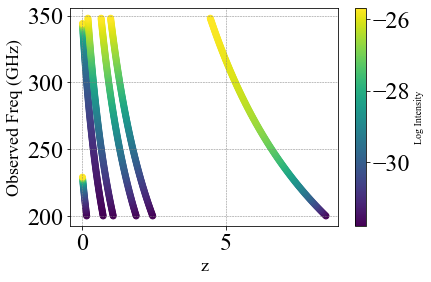

In [241]:


for i in range(A_mat.shape[0]):
    plt.scatter(redshift[i], freq_bins, c=np.log(A_mat[i]), label = 'legend')#, cmap='Greens')
plt.scatter(cII_z,freq_bins, c = np.log(cII_intensity))
plt.xlabel('z',fontsize = 18)
plt.ylabel('Observed Freq (GHz)',fontsize = 18)
plt.colorbar(label='Log Intensity')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# plt.legend(prop={'size': 20})

<ipython-input-243-638c95f0b82e>:3: RuntimeWarning: divide by zero encountered in log
  ax.scatter(redshift[i], freq_bins, c=np.log(A_mat[i]), label = df_co['line'][i])#, cmap='Greens')
<ipython-input-243-638c95f0b82e>:4: RuntimeWarning: divide by zero encountered in log
  im = ax.scatter(cII_z,freq_bins, c = np.log(cII_intensity), label = 'CII')


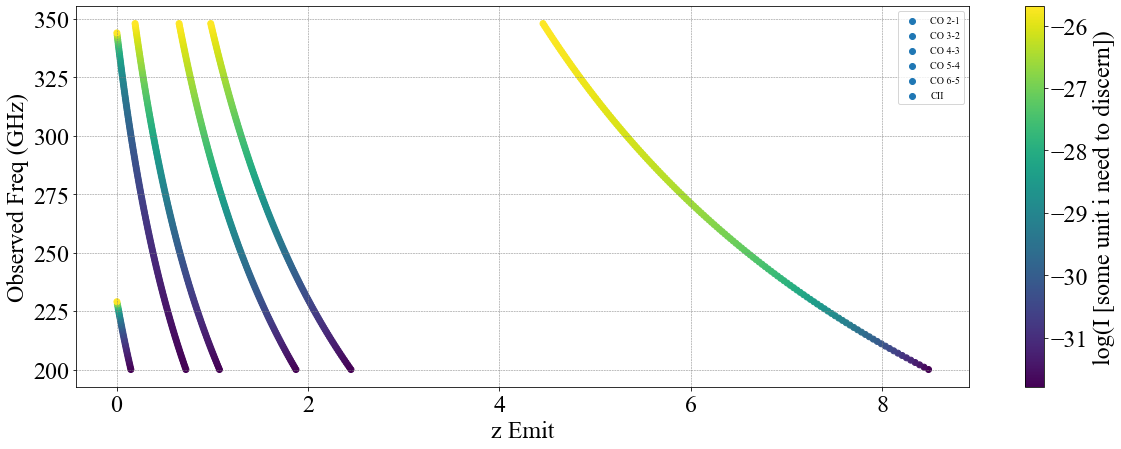

In [243]:


fig, ax = plt.subplots(1, figsize = (20,7))
for i in (1,2,3,4,5):
    ax.scatter(redshift[i], freq_bins, c=np.log(A_mat[i]), label = df_co['line'][i])#, cmap='Greens')
im = ax.scatter(cII_z,freq_bins, c = np.log(cII_intensity), label = 'CII')
ax.set_xlabel('z Emit',fontsize = 24)
ax.set_ylabel('Observed Freq (GHz)',fontsize = 24)
ax.grid(color='gray', linestyle='--', linewidth=0.5)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('log(I [some unit i need to discern])', fontsize = 24)
ax.legend()

8.49329819201995
8.469653540278657
8.44612637803538
8.422715831756872
8.399421036548098
8.376241136045735
8.353175282313213
8.330222635737341
8.307382364926411
8.284653646609815
8.262035665539138
8.239527614390664
8.217128693669338
8.19483811161409
8.172655084104534
8.150578834569046
8.128608593894114
8.106743600335044
8.084983099427893
8.063326343902716
8.041772593598008
8.020321115376388
7.998971183041466
7.9777220772558985
7.956573085460599
7.9355235017950845
7.914572627018945
7.893719768434416
7.872964239810035
7.852305361305362
7.831742459396752
7.811274866804159
7.790901922418954
7.770622971232745
7.750437364267175
7.7303444585046925
7.710343616820271
7.690434207914067
7.670615606244994
7.65088719196521
7.631248350855493
7.611698474261499
7.592236959030877
7.572863207451243
7.553576627188987
7.534376631228901
7.5152626378146286
7.496234070389901
7.477290357540566
7.458430932937391
7.439655235279625
7.42096270823931
7.402352800406336
7.3838249652342185
7.3653786609865906
7.3470133

# Schechter Parameter Inperpolation

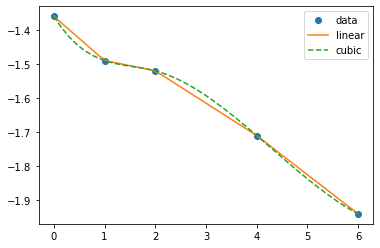

In [69]:
from scipy.interpolate import interp1d

x = [0,1,2,4,6] #redshift
y = [-1.36,-1.49,-1.52,-1.71,-1.94] #alpha 
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 6, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [142]:
data[0,3]

'-1.387201387800432'

# Schecter Function 

First we define the Luminosity function. There are 100 $L/L_*$ bins ranging from $10^{-3}$ to $10$ in log space. This will be the ditribution we will pull luminosities from (I think). 


note: light cone = all frquencies of light in a single pixel

In [6]:
#### PICK A LINE####

# define Schecter function 

ll_star = np.logspace(-3,1,10) # log space bins
delta_l = ll_star[1]-ll_star[0]

# z = np.arange(0,6,1) # linear space redshift bins 

def schecter(ll_star,log_phi,alpha):
    phi_star =10**(log_phi)
    phi = phi_star*(ll_star)**(alpha) * np.exp(-ll_star)*delta_l
    return phi

Text(0, 0.5, '$\\Phi(L/L_*)$')

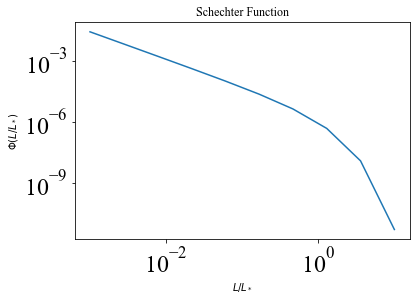

In [7]:
plt.loglog(ll_star,schecter(ll_star,df['log_phi'][0],df['alpha'][0]))
plt.title('Schechter Function')
plt.xlabel('$L/L_*$')
plt.ylabel('$\Phi(L/L_*)$')

# Source Count Distribution

Here we will use eq. (2) from the paper to compute the mean number of sources per redshift bin pre luminosity (???). We will draw numbres of sources per pixel from a poisson distribution.


Point of Confusion: 
- do I compute $<N>$ for each (l,z) bin using say the lower bound of delta_l and delta_z? 
- If I do this I'm going to have num_l by num_z average N's.I feel like that is kind of a lot. 
- for each redshift you go into each l bin, find how many sources have luminosity in that bin. Then you find the total luminoisty, given all the sources, per lum bin, then you add alll the luminosities up to find the total lum per redshift bin. But the question is, when you find the number of sources in a certain luminosity bin, what luminosity do you give them, do you pull lums in that bin from a normal distribution? --> you can probs use central lum 
- Also what is L_*

In [225]:
##TEST FOR ALL LINES


def dxdz(z):
    return sc.c/cosmo.H(z).value

def comov_vol(z,delta_z,omega_pix):
    return (omega_pix*((cosmo.angular_diameter_distance(z).value)**2)*(sc.c/cosmo.H(z).value)*delta_z) ###how to deal with delta z...

nlines = data.shape[0]
npix = 2500

L_tot = np.zeros((npix,nlines))

for h in range(nlines):

    ave_Ns = np.zeros(len(ll_star))
    
    #here you find the average Ns for each lum bin for each line
    for i in range(len(ll_star)):
        central_l = ll_star[i]+(delta_l/2)
        print(schecter(central_l,float(data[h,5]),float(data[h,3])))
        print(delta_l)
        print(comov_vol(float(data[h,1]),float(data[h,2]),(0.44**2)))
        ave_Ns[i] = schecter(central_l,float(data[h,5]),float(data[h,3]))*(delta_l)*comov_vol(float(data[h,1]),float(data[h,2]),(0.44**2))

    # this is when you populate all the pixels with sources. 
    for j in range(npix):
        for i in range(len(ll_star)):#pick a luminosity 
            numsources =  np.random.poisson(ave_Ns[i]) #find the number of sources in that (L,z)
            central_l = (ll_star[i])+(delta_l/2) # central llstar of that bin
            L_s = 10**(float(data[h,4]))
            L_tot[j,h] += (central_l*L_s) * numsources #luminosity of one (L,z) bin


8.968983609311488
0.0017825594022071256
7008927295.017088
3.5640978515163724
0.0017825594022071256
7008927295.017088
1.0839820581334787
0.0017825594022071256
7008927295.017088
0.28425856514140496
0.0017825594022071256
7008927295.017088
0.0685537810179101
0.0017825594022071256
7008927295.017088
0.015092760250819888
0.0017825594022071256
7008927295.017088
0.0027236571190869994
0.0017825594022071256
7008927295.017088
0.00028842131737634127
0.0017825594022071256
7008927295.017088
6.980701448281468e-06
0.0017825594022071256
7008927295.017088
2.7879786118314237e-09
0.0017825594022071256
7008927295.017088
14.172212286238059
0.0017825594022071256
38088450956.19106
5.400011994664796
0.0017825594022071256
38088450956.19106
1.5559036141730507
0.0017825594022071256
38088450956.19106
0.38408530752052505
0.0017825594022071256
38088450956.19106
0.08696152158374533
0.0017825594022071256
38088450956.19106
0.017955463149592652
0.0017825594022071256
38088450956.19106
0.003037716032460648
0.00178255940220

In [277]:
freq_bins = np.arange(190,315,3) #here i have 3ghz channels just to start 
cii_fg = CII_foregrounds.CII_fg(freq_bins[0],freq_bins[1])
cii_fg_2 = CII_foregrounds.CII_fg(freq_bins[6],freq_bins[7])
cii_fg_3 = CII_foregrounds.CII_fg(freq_bins[20],freq_bins[21])

cii_fg_4 = CII_foregrounds.CII_fg(freq_bins[40],freq_bins[41])



fg_1 = cii_fg.compute_fg(2500)
fg_1 = np.reshape(fg_1,(50,50))



fg_2 = cii_fg_2.compute_fg(2500)
fg_2 = np.reshape(fg_2,(50,50))




fg_3 = cii_fg_3.compute_fg(2500)
fg_3 = np.reshape(fg_3,(50,50))




fg_4 = cii_fg_4.compute_fg(2500)
fg_4 = np.reshape(fg_4,(50,50))


print(freq_bins[0],freq_bins[6],freq_bins[20],freq_bins[40])

190 208 250 310


In [246]:
cii_fg = CII_foregrounds.CII_fg(freq_bins[0],freq_bins[1])

cii_fg.compute_fg(2500)


array([[2.87404896e+13, 8.06616944e+14, 2.12671172e+15, 3.22125515e+15,
        2.99819637e+15],
       [2.87256440e+13, 8.06727818e+14, 2.12668225e+15, 3.22198788e+15,
        2.99769540e+15],
       [2.87143278e+13, 8.06703515e+14, 2.12638740e+15, 3.22136131e+15,
        2.99798204e+15],
       ...,
       [2.87159939e+13, 8.06654569e+14, 2.12678237e+15, 3.22140883e+15,
        2.99777928e+15],
       [2.87248470e+13, 8.06715886e+14, 2.12667891e+15, 3.22139071e+15,
        2.99796826e+15],
       [2.87236986e+13, 8.06798822e+14, 2.12661979e+15, 3.22135777e+15,
        2.99813691e+15]])

(2500, 5)
[9.18126743e+15 9.18096353e+15 9.18144909e+15 ... 9.18125231e+15
 9.18147591e+15 9.18084618e+15]


IndexError: index 2 is out of bounds for axis 0 with size 2

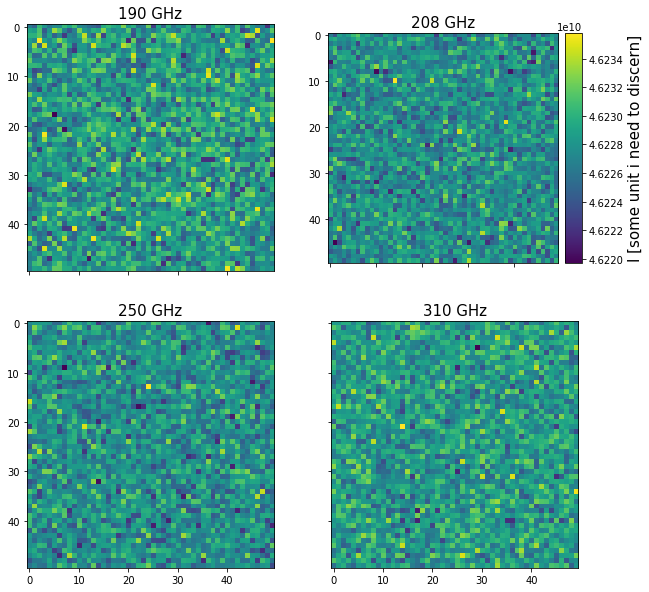

In [278]:
print(L_tot.shape)

L_total = (L_tot[:,0]+L_tot[:,1]+L_tot[:,2]+L_tot[:,3]+L_tot[:,4])
print(L_total)
L_total = np.reshape(L_total,(50,50))

co21 = np.reshape(L_tot[:,0],(50,50))
co43 = np.reshape(L_tot[:,1],(50,50))
co54 = np.reshape(L_tot[:,2],(50,50))
co65 = np.reshape(L_tot[:,3],(50,50))


from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(2,2, figsize = (10,10))
img1 = ax[0][0].imshow(fg_1/10**5)
img2 = ax[0][1].imshow(fg_2/10**5)
img3 = ax[1][0].imshow(fg_3/10**5)
img4 = ax[1][1].imshow(fg_4/10**5)
divider = make_axes_locatable(ax[0][1])
cax2 = divider.append_axes("right", size="7%", pad=0.1)
cbar = fig.colorbar(img1, cax=cax2)
cbar.set_label('I [some unit i need to discern]', fontsize = 15)
ax[0][0].set_title('190 GHz', fontsize = 15)
ax[0][1].set_title('208 GHz', fontsize = 15)
ax[1][0].set_title('250 GHz', fontsize = 15)
ax[1][1].set_title('310 GHz', fontsize = 15)
ax[1][1].get_yaxis().set_ticklabels([])
ax[0][0].get_xaxis().set_ticklabels([])
ax[0][1].get_xaxis().set_ticklabels([])
ax[0][2].get_yaxis().set_ticklabels([])





651971317.6929706


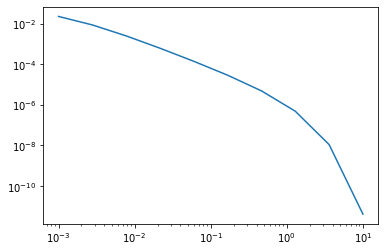

In [526]:

def dxdz(z):
    return sc.c/cosmo.H(z).value

def comov_vol(z,omega_pix):
    return (omega_pix*((cosmo.angular_diameter_distance(z).value)**2)*(sc.c/cosmo.H(z).value)*delta_z) ###how to deal with delta z...

print(comov_vol(1,0.43**2))

# Now, for this one pixel, find the average number of sources in each luminosity bin

#comov_vol(df['z'][1],0.43**2)

ave_Ns = np.zeros(len(ll_star))

for i in range(len(ll_star)):
    central_l = ll_star[i]+(delta_l/2)
    ave_Ns[i] = schecter(central_l,df['log_phi'][1],df['alpha'][1])*(delta_l)


plt.loglog(ll_star, ave_Ns) ## this means there are lots of dim sources, not many bright ones. good. 


In [527]:
# go through all the lum bins and draw source counts, and find the total luminosity given
#given how many sources you have in each lum bin 
npix = 2500

L_tot = np.zeros(npix)
# this is when you populate all the pixels with sources. 
for j in range(npix):
    for i in range(len(ll_star)):#pick a luminosity 
        numsources =  np.random.poisson(ave_Ns[i]) #find the number of sources in that (L,z)
        central_l = (ll_star[i])+(delta_l/2) # central llstar of that bin
        L_s = 10**(df['log_Ls'][1])
        L_tot[j] += (central_l*L_s) * numsources #luminosity of one (L,z) bin
    


IndexError: index 2 is out of bounds for axis 0 with size 2

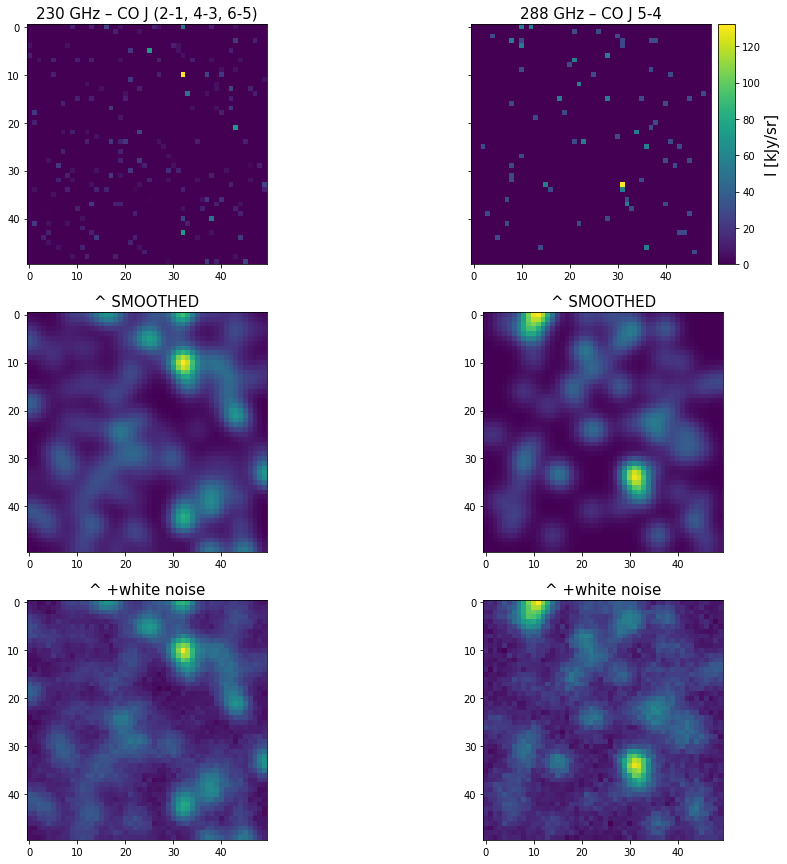

In [495]:
ghz_230 = (co21+co43+co65)



# This simulates what the single dish observation would do (i.e. smooth the data with a gaussian filter)
co54_smooth = gaussian_filter(co54, sigma=2)
ghz_230_smooth = gaussian_filter(ghz_230, sigma=2)

white_noise = np.random.normal(loc = 0, scale = 10**4, size = 2500).reshape((50,50))



ghz_230_noise = (ghz_230_smooth) + white_noise
co54_noise = co54_smooth + white_noise 

#try plotting log

fig, ax = plt.subplots(3,2, figsize = (15,15))
img1 = ax[0][0].imshow(ghz_230/10**5)
img2 = ax[0][1].imshow(co54/10**5)
img3 = ax[1][1].imshow(co54_smooth/10**5)
img4 = ax[1][0].imshow(ghz_230_smooth/10**5)
img5 = ax[2][1].imshow(co54_noise)
img6 = ax[2][0].imshow(ghz_230_noise)
divider = make_axes_locatable(ax[0][1])
cax2 = divider.append_axes("right", size="7%", pad=0.1)
cbar = fig.colorbar(img1, cax=cax2)
cbar.set_label('I [kJy/sr]', fontsize = 15)
ax[0][0].set_title('230 GHz – CO J (2-1, 4-3, 6-5)', fontsize = 15)
ax[0][1].set_title('288 GHz – CO J 5-4', fontsize = 15)
ax[1][0].set_title('^ SMOOTHED', fontsize = 15)
ax[1][1].set_title('^ SMOOTHED', fontsize = 15)
ax[2][0].set_title('^ +white noise', fontsize = 15)
ax[2][1].set_title('^ +white noise', fontsize = 15)
ax[0][1].get_yaxis().set_ticklabels([])

ax[0][2].get_yaxis().set_ticklabels([])






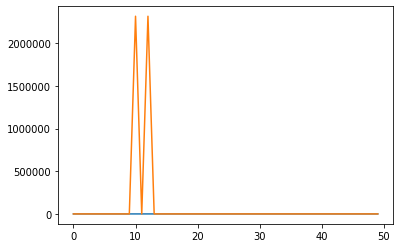

In [483]:
plt.plot(white_noise[0])
plt.plot(co54[0])

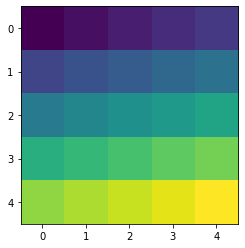

In [459]:
from scipy.ndimage import gaussian_filter
a = np.arange(50, step=2).reshape((5,5))
a

co54_smooth = gaussian_filter(co54, sigma=2)

plt.imshow(a)


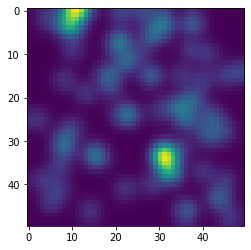

In [460]:
plt.imshow(co54_smooth)

In [155]:
cosmo.angular_diameter_distance(2).value # this is indeed the comoving angular distance

1763.9101247942342

In [156]:
cosmo.comoving_distance(2)/(1+2)

<Quantity 1763.91012479 Mpc>

# This is now a single pixel lightcone calculation! 

In [231]:
##### FIND NUMBER OF SOURCES IN EACH (L,z) based on <N> --> this is different for each pixel! 

### but you need to do this per redshift then add to get L(z)

N_z = np.zeros(len(z)) # Eff ective number counts 

# npix = 2500

# pixel_lum = np.zeros((npix,len(z)))

for i in range(len(z)):      
        for j in range(len(ll_star)):#pick a luminosity 
            numsources =  np.random.poisson(ave_Ns[j,k]) #find the number of sources in that (L,z)
            central_l = (ll_star[j])+(delta_l/2) # central luminosity
            N_z[i] += central_l * numsources #luminosity of one (L,z) bin

# do you even ever need the total luminosity, I think you only actually need N(z)

In [251]:
# I can't find the CCAT-P specs so I'm using the freq bins for Concerto instead
#for now, I'm going to a map for one line CO J(6-5) at redshift 2

#info-format = ['transition','redshift','observed freq (GHz)','fiducial lum']
co_info = ['(6-5)',2,230.49,10**(8.77)]

## 

spec_channels = np.arange(200,305,1.5)



(70,)

In [238]:
pixel_lum[:,0].shape

np.reshape(pixel_lum[:,0],(50,50))

array([[1011381.97  , 1012476.255 , 1012119.221 , ..., 1012066.257 ,
        1012325.1945, 1011967.7195],
       [1012232.843 , 1013059.7375, 1012670.596 , ..., 1012938.1935,
        1013067.019 , 1011840.044 ],
       [1011550.8075, 1011369.06  , 1012318.7405, ..., 1013314.4095,
        1011810.4695, 1011430.245 ],
       ...,
       [1011507.705 , 1012918.718 , 1012675.528 , ..., 1012917.885 ,
        1011711.375 , 1012725.5525],
       [1011545.7105, 1011569.2485, 1012110.091 , ..., 1013193.2935,
        1012143.574 , 1011569.7895],
       [1012307.348 , 1012760.8735, 1011815.112 , ..., 1012393.243 ,
        1013289.423 , 1011632.393 ]])

(0.0, 1.0, 0.0, 1.0)

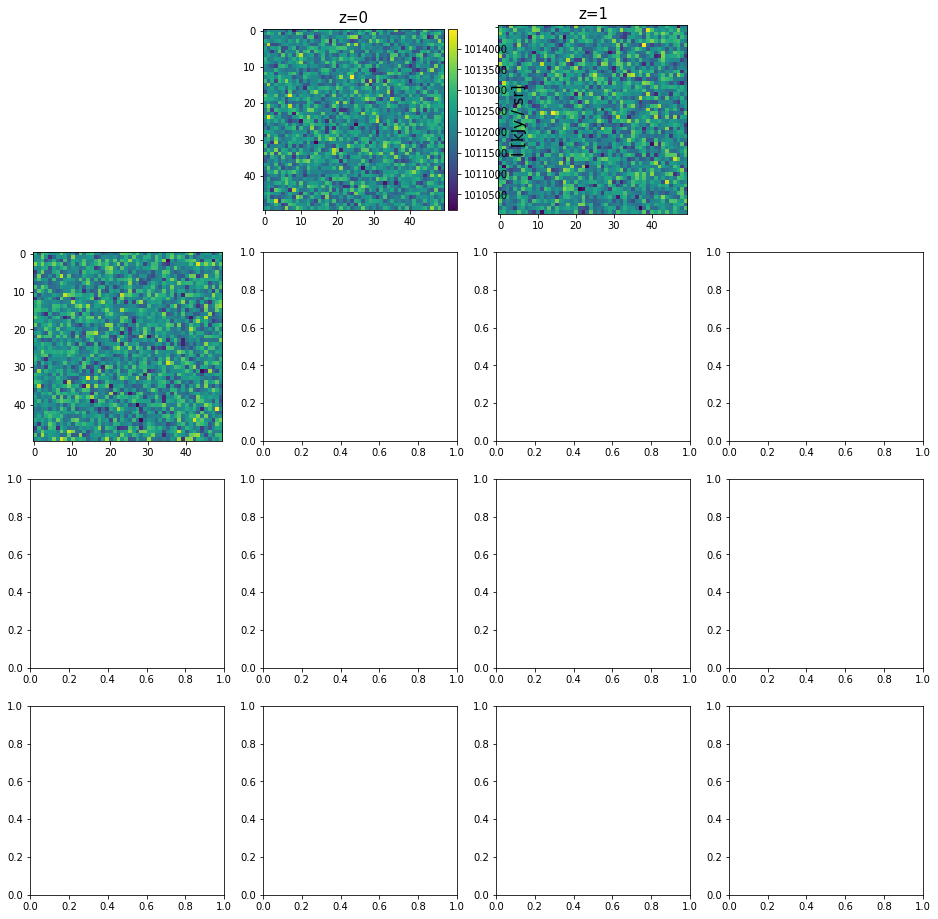

In [248]:
# now multiply this N_z by the L_s_CO 

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(4,4, figsize = (16,16))
pix_0 = np.reshape(pixel_lum[:,0],(50,50))
img1 = ax[0][1].imshow(pix_0)
pix_1 = np.reshape(pixel_lum[:,1],(50,50))
img2 = ax[0][2].imshow(pix_1)
pix_2 = np.reshape(pixel_lum[:,2],(50,50))
img3 = ax[1][0].imshow(pix_2)
divider = make_axes_locatable(ax[0][1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img1, cax=cax2)
cbar.set_label('I [kJy / sr]', fontsize = 15)
ax[0][1].set_title('z=0', fontsize = 15)
ax[0][2].set_title('z=1', fontsize = 15)
ax[0][2].get_yaxis().set_ticklabels([])
ax[0][3].axis('off')
ax[0][0].axis('off')

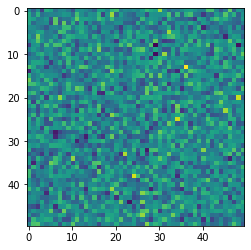

In [186]:
plt.imshow(pixel_lum)

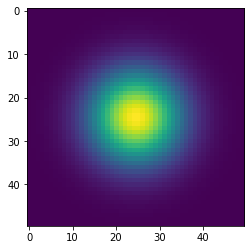

In [3]:
#Convolve sky map with a 2D gaussian 
npix = 2500

flat_sky = signal.unit_impulse(npix, (npix//2)+25)+ signal.unit_impulse(npix, (npix//3)+25)
sky =  np.reshape(flat_sky, (50,50))



def gauss(x,y,sigma_x,sigma_y,mu_x,mu_y):
    return (1/(2*np.pi*sigma_x*sigma_y))*np.exp(-((((x-mu_x)**2)/(2*(sigma_x**2))) + (((y-mu_y)**2)/(2*(sigma_y**2)))))
                                               
x = np.linspace(-2.5,2.5,50)
y = np.linspace(-2.5,2.5,50)

xx, yy = np.meshgrid(x, y, sparse = True)

mu_x = 0
mu_y = 0

sigma_x = 0.75 #arcmin
sigma_y = 0.75 #arcmin

gaussian = np.reshape(gauss(xx,yy,sigma_x,sigma_y,mu_x,mu_y),(50,50))


plt.imshow(gaussian)
sky_fft = np.fft.fft2(sky)
gauss_fft = np.fft.fft2(gaussian)
                                            

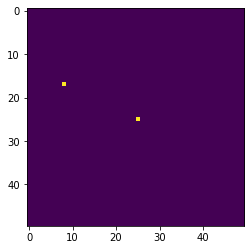

In [76]:
plt.imshow(sky)

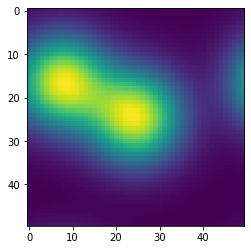

In [77]:
product = sky_fft*gauss_fft

new_sky = np.fft.ifftshift(np.fft.ifft2(product))

plt.imshow(np.real(new_sky)) #fix periodic boundary cond. 

In [7]:
from CCAT_p import CCAT_p

In [8]:
flat_sky = signal.unit_impulse(npix, (npix//2)+25)+ signal.unit_impulse(npix, (npix//3)+25)


convolved_sky = CCAT_p(flat_sky,npix,sigma_x,sigma_y,mu_x,mu_y )

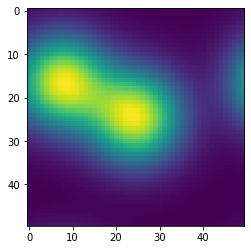

In [10]:
plt.imshow(np.real(convolved_sky))

In [12]:
(((3*(10**(-7)))/(10**(-6)))**(2))*((1/3)**(2))*(((10**3)+1)/(30))*20

6.673333333333332